# Explore here

In [62]:
# Your code here

# Bibliotecas necesarias
import json
import zipfile
import os
import pandas as pd
from PIL import Image
import random



In [63]:
root_path = '/content'

In [64]:
!pip install kaggle
!mkdir ~/.kaggle
!touch '/root/.kaggle/kaggle.json'

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [65]:
## Appi token
api_token = {"username":"mariabottini","key":"b650b216bc3e51dd7fa6e3630cbca6db"}

In [66]:
with open("/root/.kaggle/kaggle.json", "w") as file:
 json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

# Paso 1: Carga del conjunto de datos

In [67]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
for file in os.listdir():
 if file.endswith(".zip"):
  zip_ref = zipfile.ZipFile(file, "r")
  zip_ref.extractall()
  zip_ref.close()

In [69]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
# Define los caminos a los archivos zip
train_zip_path = '/content/train.zip'
test_zip_path = '/content/test1.zip'
# Define los directorios donde se descomprimirán los archivos
train_dir = '/content'
test_dir = '/content'
# Función para descomprimir archivos zip
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
# Descomprime los archivos zip
unzip_file(train_zip_path, train_dir)
unzip_file(test_zip_path, test_dir)

In [70]:
train_dir = "/content/train"
test_dir = "/content/test1"

Paso 2: Visualiza la información de entrada

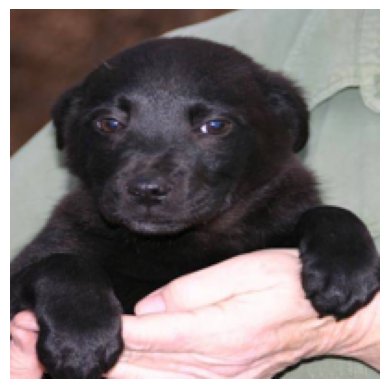

Dimensiones de la imagen: (395, 499)


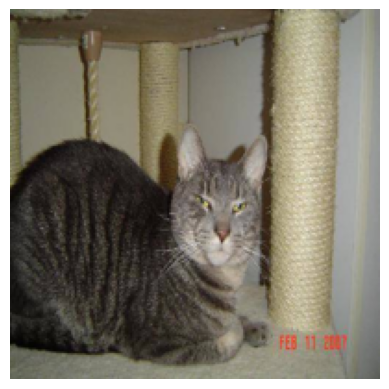

Dimensiones de la imagen: (499, 375)


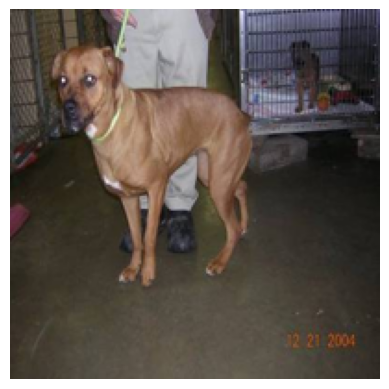

Dimensiones de la imagen: (399, 300)


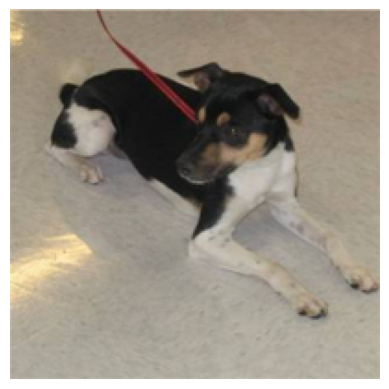

Dimensiones de la imagen: (319, 320)


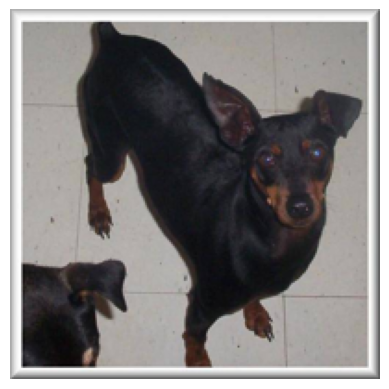

Dimensiones de la imagen: (500, 473)


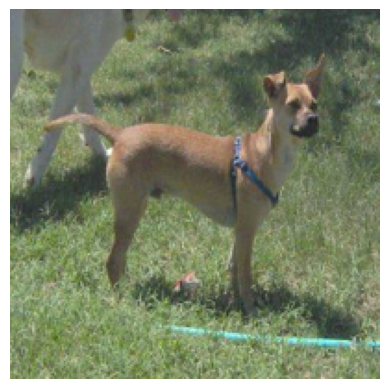

Dimensiones de la imagen: (399, 313)


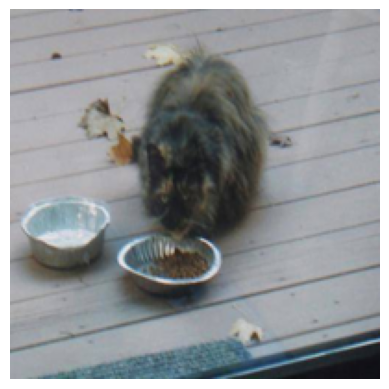

Dimensiones de la imagen: (499, 333)


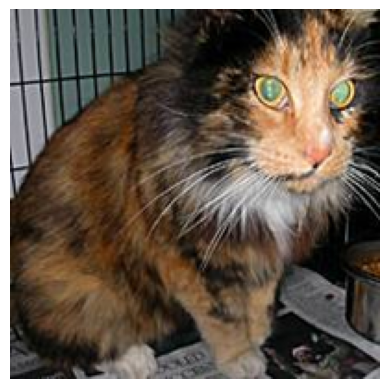

Dimensiones de la imagen: (223, 204)


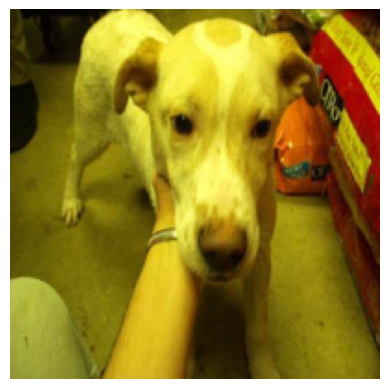

Dimensiones de la imagen: (500, 374)


In [71]:
from PIL import Image
import matplotlib.pyplot as plt

# Obtener una lista de archivos de imagen en el directorio de entrenamiento
train_images = os.listdir(train_dir)

# Función para mostrar una imagen y sus dimensiones
def show_image(image_path):
    image = Image.open(image_path)
    image_resized = image.resize((200, 200))
    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()
    print(f'Dimensiones de la imagen: {image.size}')

# Mostrar las primeras 5 imágenes y sus dimensiones
for i in range(9):
    image_path = os.path.join(train_dir, train_images[i])
    show_image(image_path)


In [72]:
import pandas as pd

In [73]:


def load_images(folder, img_size=(200, 200), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)

    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]

    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

    return np.array(images), np.array(labels)

In [74]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

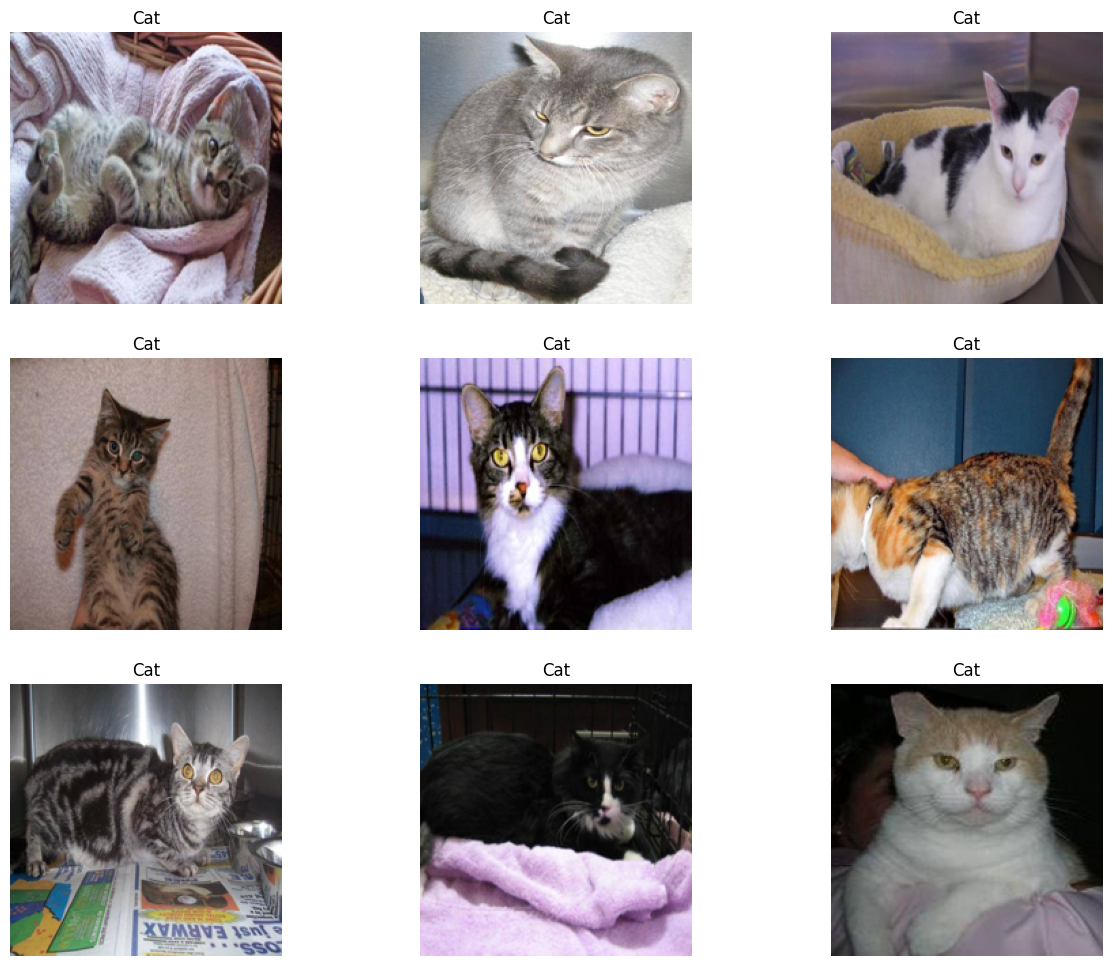

In [75]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

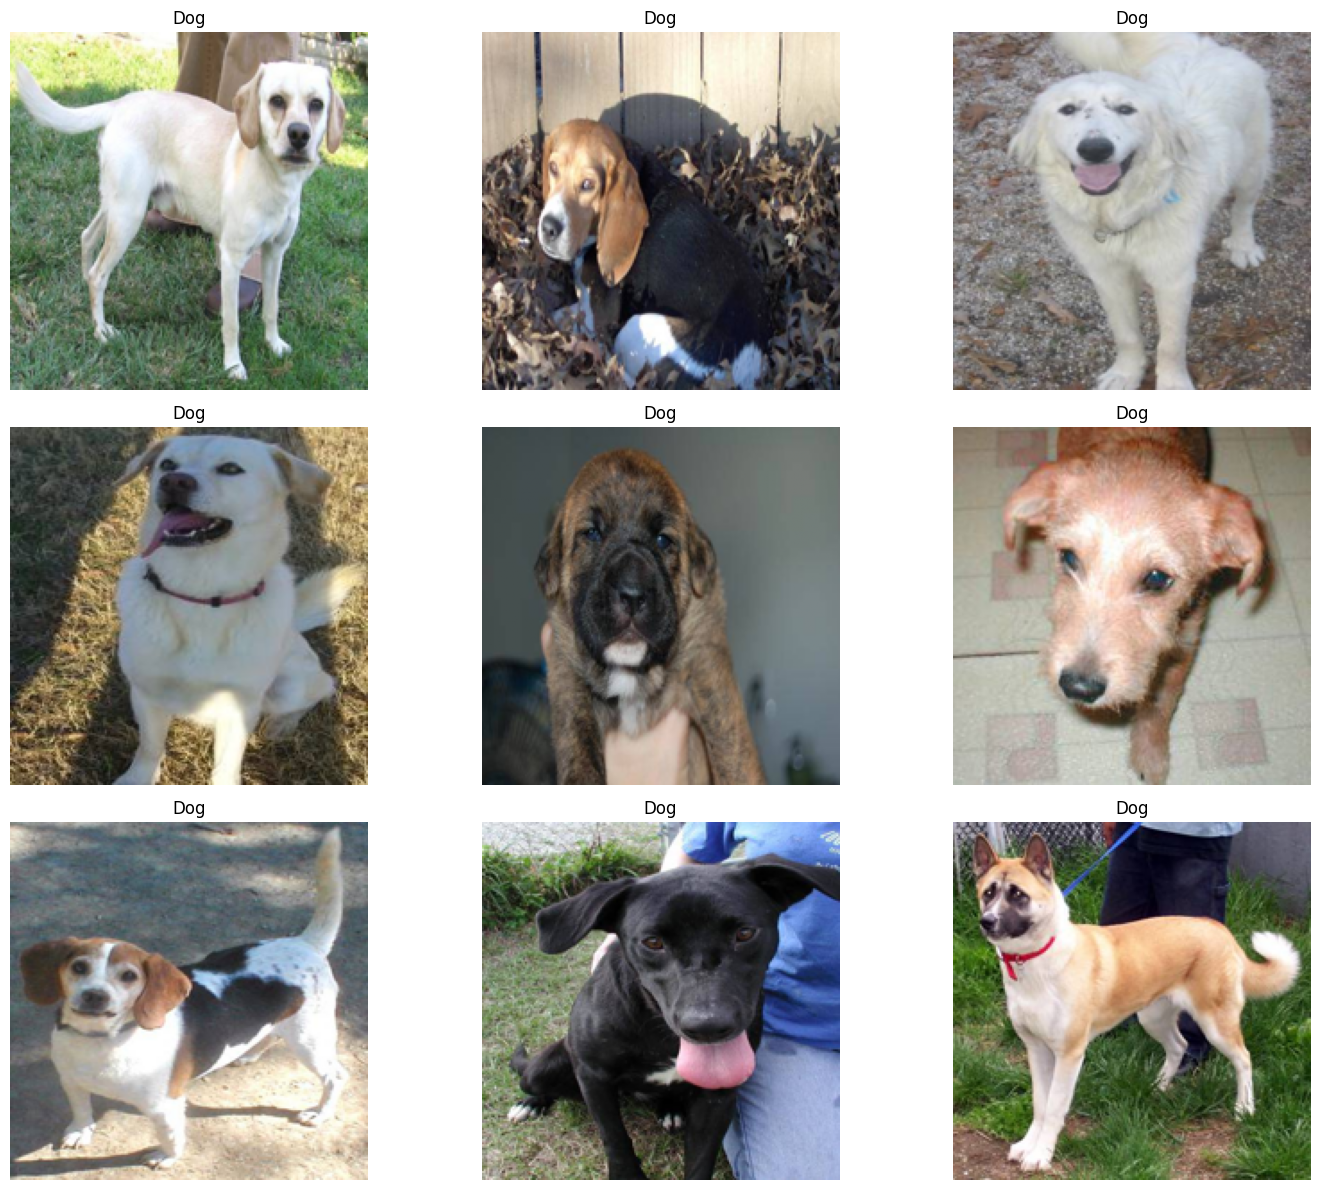

In [76]:
dog_images, dog_labels = load_images(train_dir, sample_count=9, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=9)

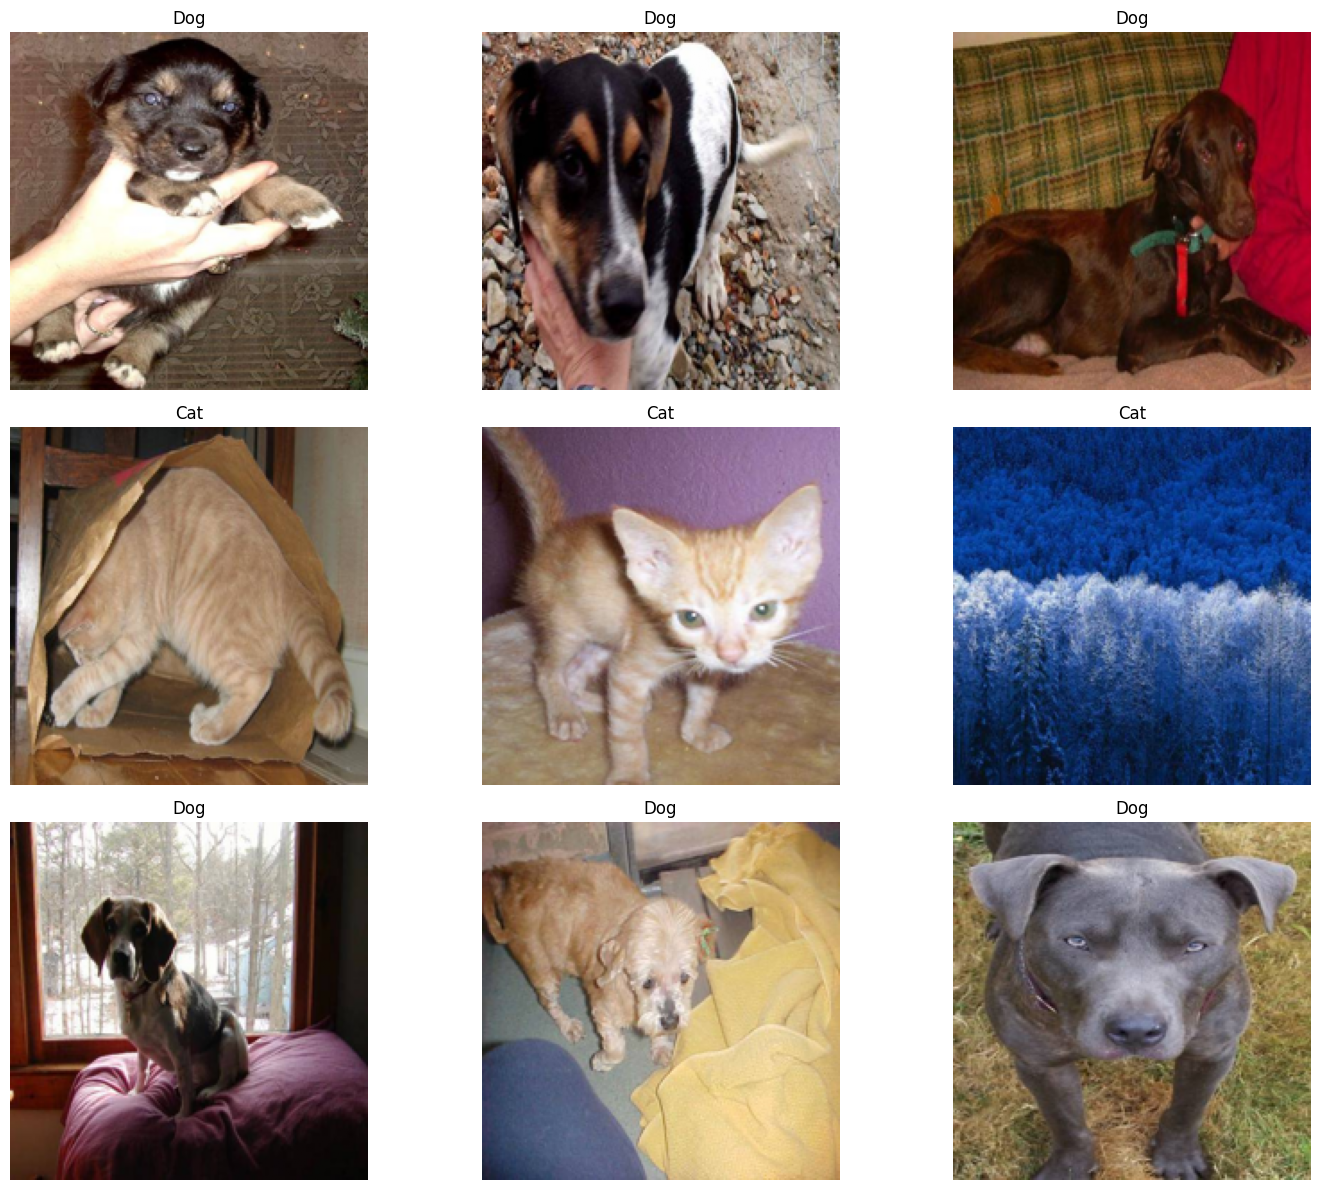

In [77]:
all_images, all_labels = load_images(train_dir, sample_count=9)
visualize_images(all_images, all_labels, sample_count=9)

In [78]:
image_path

'/content/train/dog.985.jpg'

In [79]:
# Inicializa un DataFrame vacío
data_cat = []

In [80]:
for filename in os.listdir(train_dir):
    if filename.startswith('cat'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_cat.append(data)


In [81]:
# Crear el DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data_cat)

In [82]:
df["label"] = "cat"

In [83]:
# Mostrar el DataFrame
print(df)

            filename label
0       cat.4013.jpg   cat
1       cat.2647.jpg   cat
2      cat.11573.jpg   cat
3      cat.11845.jpg   cat
4      cat.11660.jpg   cat
...              ...   ...
12496    cat.425.jpg   cat
12497   cat.8421.jpg   cat
12498  cat.10536.jpg   cat
12499   cat.3226.jpg   cat
12500  cat.11805.jpg   cat

[12501 rows x 2 columns]


In [84]:
# Inicializa un DataFrame vacío
data_dog = []

In [85]:
for filename in os.listdir(train_dir):
    if filename.startswith('dog'):
        # Construir la ruta completa del archivo
        image_path = os.path.join(train_dir, filename)

        # Crear un diccionario con los datos de la imagen
        data = {
            'filename': filename,
        }

        # Añadir la fila al DataFrame
        data_dog.append(data)

In [86]:
# Crear el DataFrame a partir de la lista de diccionarios
df_dog = pd.DataFrame(data_dog)

In [87]:
df_dog["label"] = "dog"

In [88]:
# Mostrar el DataFrame
print(df_dog)

            filename label
0      dog.11636.jpg   dog
1        dog.517.jpg   dog
2      dog.10625.jpg   dog
3       dog.1623.jpg   dog
4       dog.5137.jpg   dog
...              ...   ...
12496   dog.2240.jpg   dog
12497   dog.5105.jpg   dog
12498   dog.5710.jpg   dog
12499   dog.8622.jpg   dog
12500   dog.6947.jpg   dog

[12501 rows x 2 columns]


In [89]:
import shutil

In [ ]:
# # Definir los directorios de origen y destino
# source_dir = 'path/to/source_dir'
# dog_dir = 'path/to/dog_dir'
# cat_dir = 'path/to/cat_dir'

# # Crear los directorios de destino si no existen
# os.makedirs(dog_dir, exist_ok=True)
# os.makedirs(cat_dir, exist_ok=True)


In [90]:
# Mueve las imágenes a los subdirectorios correspondientes
for filename in os.listdir(train_dir):
    # Ruta completa del archivo
    filepath = os.path.join(train_dir, filename)

    # Verifica que sea un archivo y no un directorio
    if os.path.isfile(filepath):
        if filename.startswith('dog'):
            shutil.move(filepath, os.path.join(dog_dir, filename))
        elif filename.startswith('cat'):
            shutil.move(filepath, os.path.join(cat_dir, filename))
print("Imágenes reorganizadas en subdirectorios.")

Imágenes reorganizadas en subdirectorios.


In [92]:
# Directorio de origen
train_dir = r"../content/train"
# Directorios de destino
dog_dir = os.path.join(train_dir, 'dog')
cat_dir = os.path.join(train_dir, 'cat')
# Crea los subdirectorios si no existen
os.makedirs(dog_dir, exist_ok=True)
os.makedirs(cat_dir, exist_ok=True)
# Mueve las imágenes a los subdirectorios correspondientes
for filename in os.listdir(train_dir):
    if filename.startswith('dog'):
        shutil.move(os.path.join(train_dir, filename), os.path.join(dog_dir, filename))
    elif filename.startswith('cat'):
        shutil.move(os.path.join(train_dir, filename), os.path.join(cat_dir, filename))
print("Imágenes reorganizadas en subdirectorios.")


Error: Cannot move a directory '../content/train/dog' into itself '../content/train/dog/dog'.

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [94]:
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

In [111]:
# Define a few rules for DataGen
train_dir = "../content/train"
image_size = (200, 200)

In [120]:
image_path

'/content/train/dog.6947.jpg'

In [121]:
# Define a few rules for DataGen
test_dir = "../content/test1"
image_size = (200, 200)

In [112]:
# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"]
)

Found 25000 images belonging to 2 classes.


In [124]:
# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = [""]
)

Found 12500 images belonging to 1 classes.


Paso 3: Construye una RNA

In [125]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten


In [126]:
model = Sequential()
model.add(Conv2D(input_shape = (220,220,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

In [127]:
# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [128]:
# Compile the Model using Adam
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [45]:
# Train the Model
model.fit(train_data, epochs = 1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 5862s 68s/step - accuracy: 0.4824 - loss: 1270.7897


Paso 4: Optimiza el modelo anterior

In [129]:

from keras.callbacks import ModelCheckpoint, EarlyStopping

In [130]:
from tensorflow.keras.models import Sequential

In [131]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [155]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Set up ModelCheckpoint and EarlyStopping
checkpoint = ModelCheckpoint(
    "../models/vgg16_1.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="max"
)

early = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=1,
    mode="max"
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
pip install tensorflow

In [146]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │       4,333,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,281,032 (50.66 MB)

 Trainable params: 4,427,010 (16.89 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,854,022 (33.78 MB)

In [147]:
from tensorflow.keras.utils import to_categorical

In [156]:
# Assuming train_data and test_data are already defined: esta parte es la que no funciona
hist = model.fit(
    train_data,
    steps_per_epoch=len(train_dir),
    validation_data=test_data,
    validation_steps=len(test_dir),
    epochs=3,
    callbacks=[checkpoint, early]
)

Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5232 - loss: 211.5173

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

In [157]:
print(hist.history)

NameError: name 'hist' is not defined

In [158]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

NameError: name 'hist' is not defined

Paso 5: Guarda el modelo